# Perceptron
* Introduced in the 1950's by Minsky and Papert
* Frank Rosenblatt proved perceptron's convergence in 1962
* Works perfectly for linearly separabale data
* Different improvements/versions(see gradient descent,stochastic gd, linear programming) and enhancements have come over the years for multi-class and non-linearly separable data-sets(see Pocket Perceptron)

In [1]:
%matplotlib inline

# imports
import math
import matplotlib
import numpy as np
import pandas as pd
from numpy.random import rand
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt

# constants and config
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

# plots in xkcd style !
plt.xkcd()

## Utility Functions

In [2]:
# Generate circular data points(2 dimensinal)
# Params:
# + X : the x coordinate for center of this data set
# + Y : the y coordinate for center of this data set
# + r : radius of the circle
# + class_label : a numeric label to be assigned to all data points of this set
# + n: number of data points to be generated for this dataset
def gen_circular_data(X=0,
                      Y=0,
                      r=1,
                      class_label=0,
                      n=100):
    
    return [(X+(math.cos(2*3.14/n*x)*r-rand(1)[0]),
             Y+(math.sin(2*3.14/n*x)*r-rand(1)[0]),
            class_label) for x in xrange(0,n)]

In [3]:
# Assign a class label to data point based on decision boundary
# Params:
# + data_point : the data point to be analysed for assigning class label
# + decision_threshold : if data point is greater than or equal to this, it is assigned positive label, else negative label
# + positive_label : a numeric label to be assigned if data point is greater than or equal to threshold
# + negative_label : a numeric label to be assigned if data point is less than threshold
def get_output_label(data_point,
                     decision_threshold=0.0,
                     positive_label =1, 
                     negative_label = -1):
    
    return positive_label if data_point >= decision_threshold else negative_label

In [4]:
# Generates a dot product between a row of input data frame and weight vector
def process_input(row,weights_array=[1,0,0]):
    return np.dot(row,weights_array[1:])+weights_array[0]

In [5]:
# update weights of the perceptron
def update_weights(row,weights_array=[1,0,0],lr=0.001):
    # get predicted label using current weight vector
    predicted_label = get_output_label(process_input(row[['X','Y']],weights_array=weights_array))
    
    # calculate the error as:
    # learning_rate *(actual_label - predicted_label)
    error = lr*(row['label'] - predicted_label)
    
    # adjust the weights
    weights_array[0] += error
    weights_array[1] += row['X']*error
    weights_array[2] += row['Y']*error
    return weights_array

In [6]:
# train the perceptron
def train_perceptron(input_df,learning_rate=0.001,epochs=10):
    # start with arbitrary weight vector
    weights_array = [rand(1)[0],0,0]

    # iterate epoch number of times
    result = None
    for itr in range(epochs):
        print "Weights for epoch:"+str(itr+1)+"=>",weights_array
        # weights_array
        weights_array = list(input_df.apply(update_weights,
                                                axis=1,
                                                weights_array=weights_array,
                                                lr=0.001).ix[0])
    return weights_array

## Data to be Classified

In [7]:
data_class1 = pd.DataFrame(data=gen_circular_data(X=2,Y=1,class_label=1,n=100),
                 columns=['X','Y','label'])

data_class2 = pd.DataFrame(data=gen_circular_data(X=3,Y=-2.5,class_label=-1,n=50),
                  columns=['X','Y','label'])

input_df = data_class1.append(data_class2).sample(frac=1).reset_index(drop=True) 

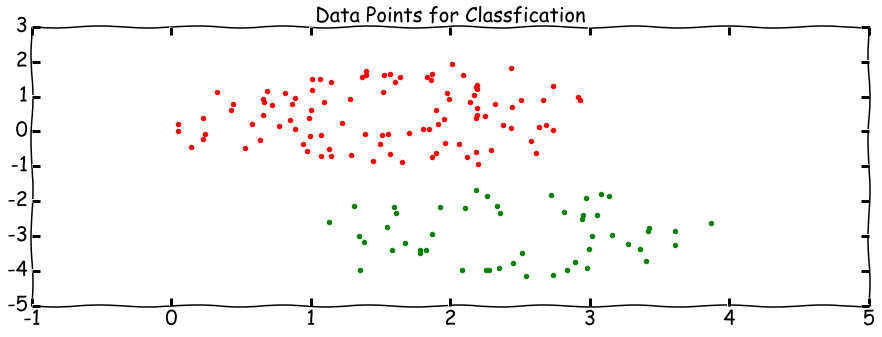

In [8]:
# plot input data
plt.scatter(data_class1['X'],data_class1['Y'],color='red')
plt.scatter(data_class2['X'],data_class2['Y'],color='green')
plt.title('Data Points for Classfication')

### Perceptron in Action

* Input the data to ```train_perceptron``` function
* It executes the perceptron algorithm for multiple epochs and print the final weights
* The final result is available in ```weights_array```

In [9]:
weights_array =  train_perceptron(input_df=input_df,epochs=10)

Weights for epoch:1=> [0.66427970265095904, 0, 0]
Weights for epoch:2=> [0.60827970265095899, -0.12410282747874526, 0.15200497327326651]
Weights for epoch:3=> [0.59627970265095898, -0.1449423622972757, 0.17750530899275213]
Weights for epoch:4=> [0.59427970265095897, -0.14756057703626344, 0.18177545061856365]
Weights for epoch:5=> [0.59227970265095897, -0.15017879177525117, 0.18604559224437517]
Weights for epoch:6=> [0.59227970265095897, -0.15017879177525117, 0.18604559224437517]
Weights for epoch:7=> [0.59227970265095897, -0.15017879177525117, 0.18604559224437517]
Weights for epoch:8=> [0.59227970265095897, -0.15017879177525117, 0.18604559224437517]
Weights for epoch:9=> [0.59227970265095897, -0.15017879177525117, 0.18604559224437517]
Weights for epoch:10=> [0.59227970265095897, -0.15017879177525117, 0.18604559224437517]


## Visualize the Result
* The below plot shows the decision boundary between two classes as determined by our perceptron

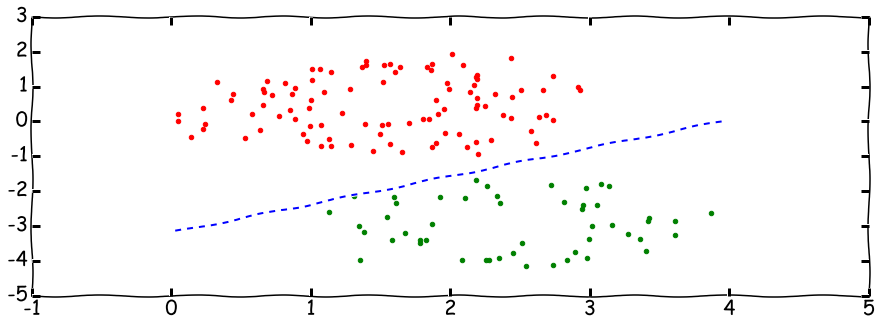

In [10]:
plt.plot([-weights_array[0]/weights_array[1], 0],[0, -weights_array[0]/weights_array[2]],'--',color='blue')
plt.scatter(data_class1['X'],data_class1['Y'],color='red')
plt.scatter(data_class2['X'],data_class2['Y'],color='green')

### References
+ [Perceptron pdf, FU-Berlin](https://page.mi.fu-berlin.de/rojas/neural/chapter/K4.pdf)
+ [Perceptron ppt, CMU](https://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15381-f01/www/handouts/110601.pdf)
+ [Perceptron pdf](http://hagan.okstate.edu/4_Perceptron.pdf)